# Week 2 - ggplot introduction
This week we are covering basic ggplot syntax and beginning to plot distribution plots using the iris dataset from R. In this code we cover ggplot basics, aesthetic formatting, setting a theme for your plot, incorporating multiple data layers into a plot, and exporting figures from R.

### Contents
1. [Load packages and dataset](#1)
2. [ggplot basics](#2)
3. [Theme formatting](#3)
4. [Multiple data layers](#4)   
5. [Exporting figures](#5)   

<a id="1"></a>
### Load packages and dataset
For this script we will need the following packages: ggplot2, datasets, viridis, and ggridges. If you do not have these installed, install them in RStudio or using the command `install.packages("packageName")`. Once installed we will load the packages using the `library()` command below. 

In [1]:
library(ggplot2)
library(datasets)
library(viridis)
library(ggridges)

Loading required package: viridisLite



Next we are going to load the iris dataset from R. The iris dataset comes from a 1936 species that looks at four variables across 3 species. There are 50 samples for each species in this dataset. The following commands load the dataset into R and then print the first 10 lines of the dataset so we can see how it's formatted.

In [2]:
data(iris)
head(iris, n = 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


<a id="2"></a>
### ggplot basics
In this section we are going to cover the basic ggplot command format and theme customization. Throughout the rest of this script we will continue to build on the features we cover in this section.

The basic ggplot command always begins with `ggplot()` followed by designating the type of plot using a geom function. When typing geom into an R script you should see a drop down menu with all of the options. Then either in the `ggplot()` or the `geom_[plotType]()` section of the command you have to designate your aesthetics. To do this the format is either `ggplot(data, aes(x, y, [other variables])) + geom_[plotType]()` or `ggplot() + geom_[plotType](data, aes(x, y, [other variables]))`. The other variables include things like shape, size, opactiy, and fill/color, which we will go through further on in this script. 

Let's start with a basic boxplot of Sepal.Length by Species.

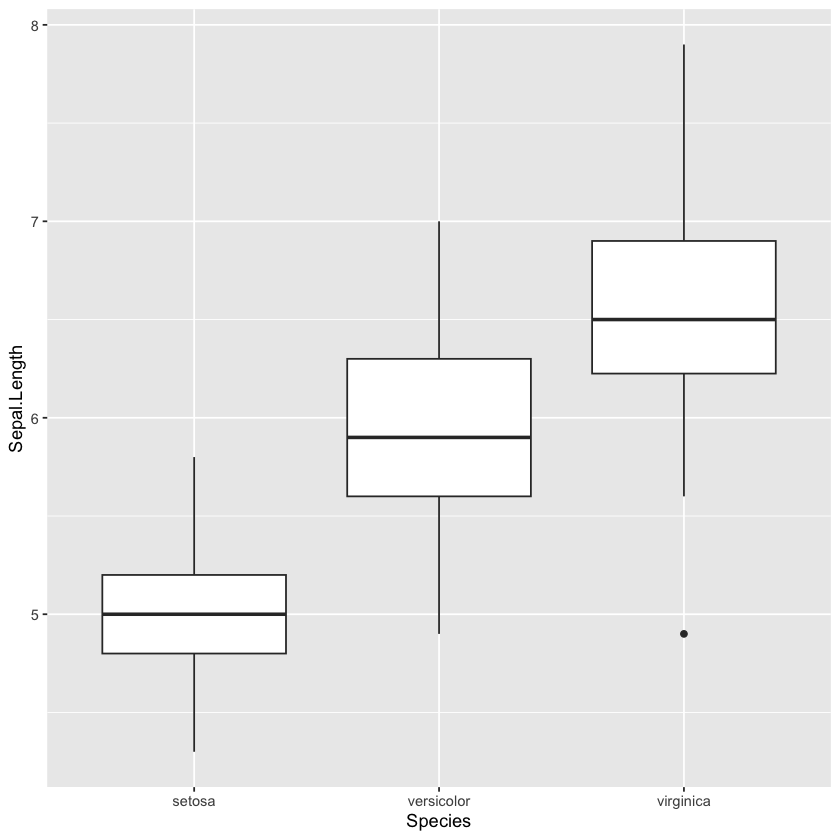

In [3]:
ggplot(data = iris, aes(x = Species, y = Sepal.Length)) + geom_boxplot()

Next we are going to add in some aesthetic variables like fill.

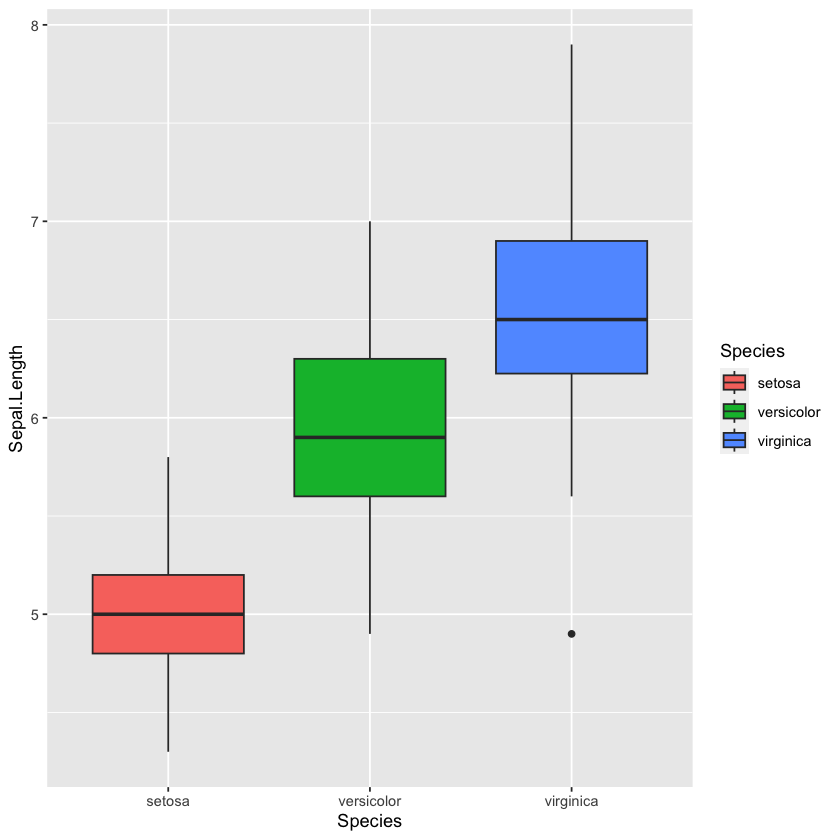

In [4]:
ggplot(data = iris, aes(x = Species, y = Sepal.Length, fill = Species)) + geom_boxplot()

<a id="3"></a>
### Theme formatting
We will cover customizing fill and other aesthetic variables further on, so next we're going to talk about formatting theme. Theme allows you to set background and border colors, gridline formats, text formats and more. Here we will go through a few examples of how this works and how we can set a theme so we don't have to designate it in every plot. 

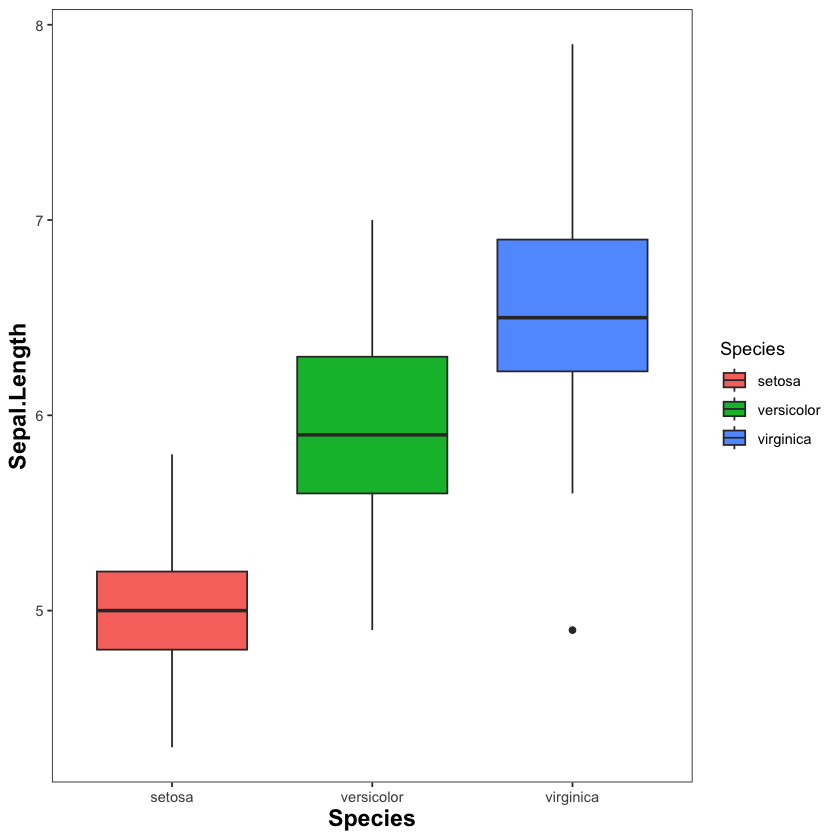

In [5]:
ggplot(data = iris, aes(x = Species, y = Sepal.Length, fill = Species)) + geom_boxplot() +
theme_bw() + theme(panel.background = element_rect(fill = "white"), panel.grid = element_blank()) +
theme(axis.title = element_text(size = 14, face = "bold")) + 
theme(legend.position = "right")

If you know what theme you want for multiple plots and don't want to type it over and over in every plot command, we can use `theme_set()` to set a theme for any plots made following that line of code. Below is a `theme_set()` command with all of the same theme settings from the plot command above. The second command is the same plot command minus the theme sections and when we first run `theme_set()` followed by our plot command we see that that theme is applied to the plot even though there are no theme settings in the plot command.

In [6]:
theme_set(theme_bw() + theme(panel.background = element_rect(fill = "white"), 
                             panel.grid = element_blank()) +
theme(axis.title = element_text(size = 14, face = "bold")) + 
theme(legend.position = "right"))

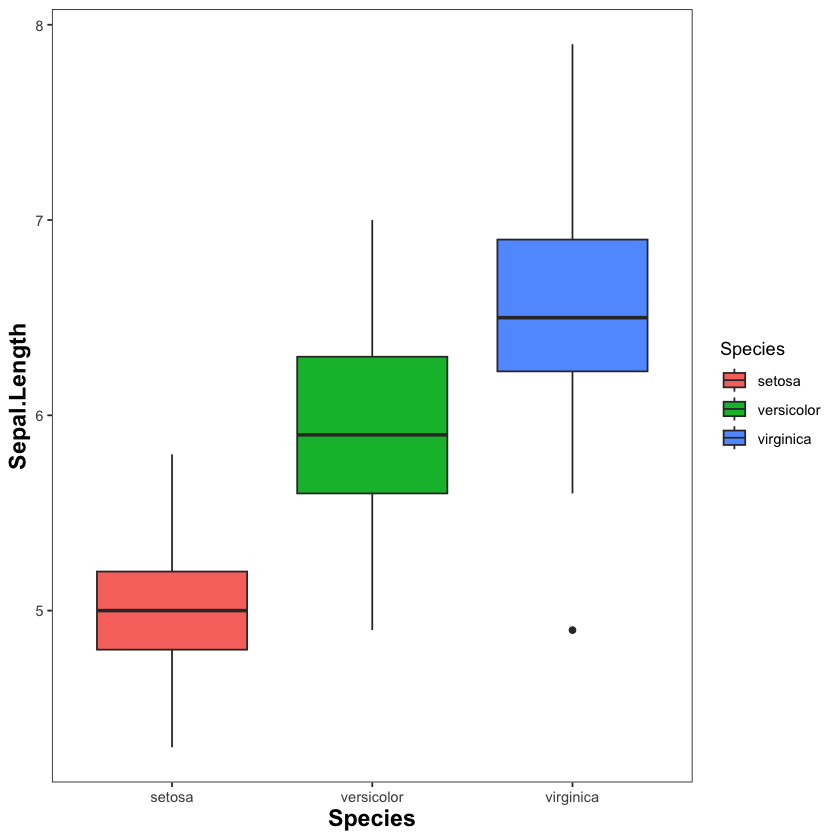

In [7]:
ggplot(data = iris, aes(x = Species, y = Sepal.Length, fill = Species)) + geom_boxplot()

<a id="4"></a>
### Multiple data layers
Next we are going to use multiple data layers in a plot. The command below uses both box plots and points to show the overall distribution of the data. Because we have multiple geoms in this command we need to be careful about how we designate aesthetics. Any aesthetic in the `ggplot()` portion of the parentheses will automatically apply to all of the geoms in the plot command. However, we can designate separate aesthetics in each geom so that they only apply to the geom we want.

Below, we have `geom_boxplot()` and `geom_point()`. We move the fill variable out of the `ggplot()` section of the previous command to the `geom_boxplot()` portion of the command so that only applies to the box plot portion of the plot. Alpha is used to adjust the opacity of the box plot, in this case to 50% opacity (alpha operates on a 0-1 scale, 0 being see through and 1 being completely opaque). The alpha is located within `geom_boxplot()` but outside of `aes()` because we want that to be applied consistently to all boxes and not scaled by a variable in our dataset. For the `geom_point()` aesthetics we designate color as Species to color the points by the Species variable. The default point is a line color with no fill which is why we use color here instead of fill, but if we change the shape to one with a fill color we would need to adjust that. Finally, the `position = "jitter"` portion of the `geom_point()` command moves the points apart from each other so that points with the same y value don't appear completely on top of one another. There are other position options to explore that will give different visual results so you can play around with that.

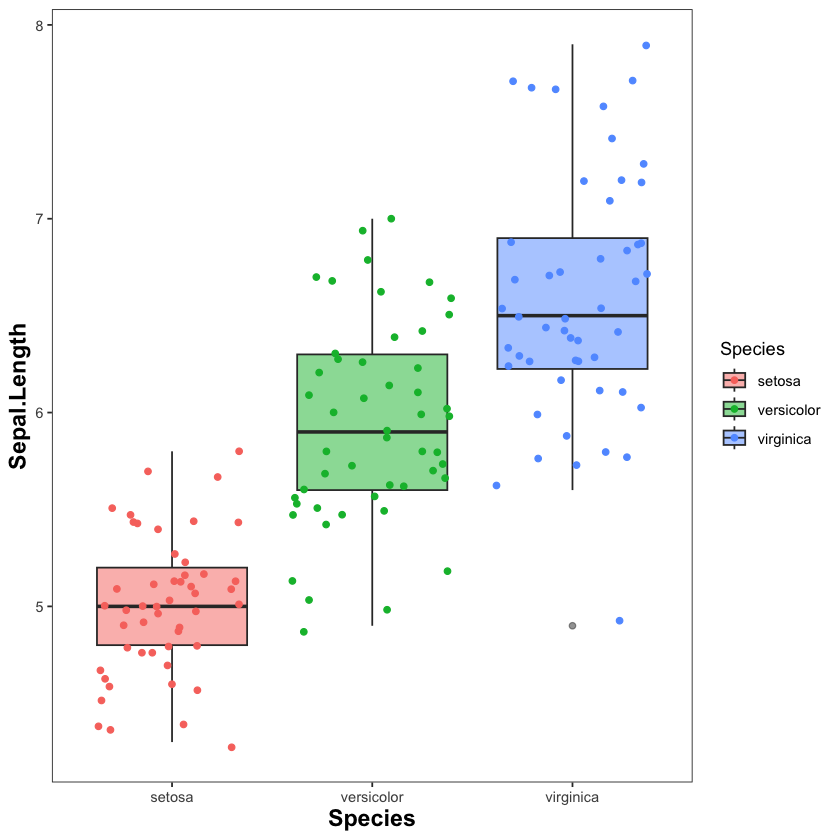

In [8]:
ggplot(data = iris, aes(x = Species, y = Sepal.Length)) + geom_boxplot(alpha = 0.5, aes(fill = Species)) +
geom_point(position = "jitter", aes(color = Species))

<a id="5"></a>
### Exporting figures
The final thing we covered this week is exporting graphs from R using `ggsave()`. This command provides a lot of flexibility for exporting over the graphical export button from RStudio. By exporting your figure in this way you will also guarantee that you will export the figure at the same dimensions each time which can be valuable for maintaining consistency when editing figures for presentations and manuscripts. 

The first command below is plotting the same plot immediately above but saving it as an object in your environment named "plot". You can name your plots anything in your code, but they will need to be saved as an object to export them using `ggsave()`. Immediately after the plot command, I simply type the name of the plot and run just that to view my figure. 

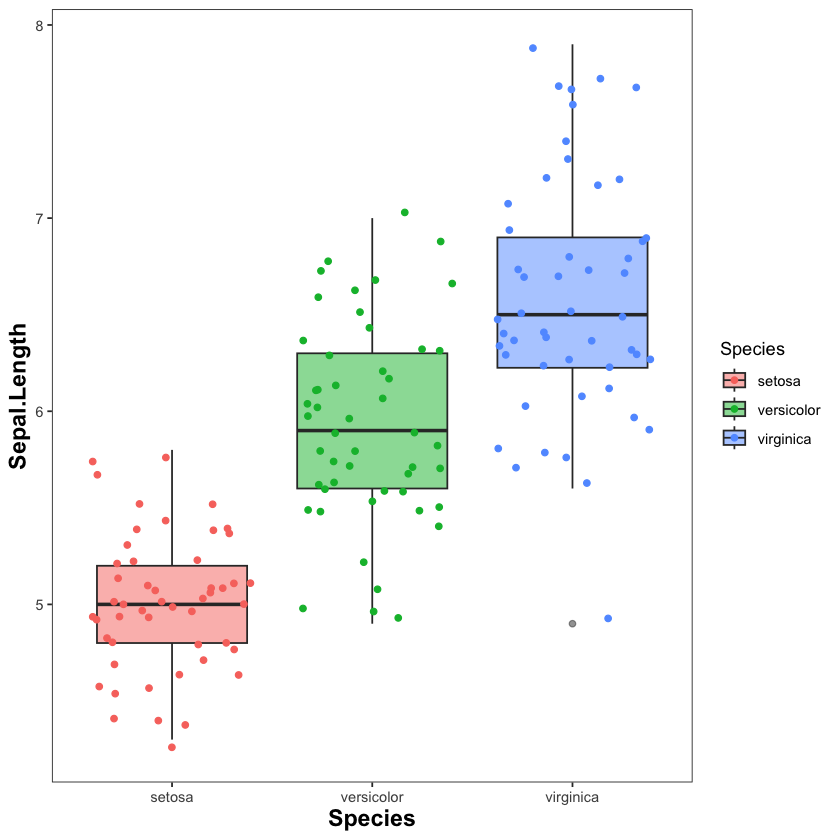

In [10]:
plot <- ggplot(data = iris, aes(x = Species, y = Sepal.Length)) + geom_boxplot(alpha = 0.5, aes(fill = Species)) +
        geom_point(position = "jitter", aes(color = Species))
plot

Finally, the `ggsave()` command follows the following structure: 

`ggsave("[filename.filetype]", plotObject_name, [OPTIONS])`

The options demonstrated below show a plot exported as 7x7cm in dimension and 300dpi in resolution. These numbers can be adjusted for what works best for your figure. Additionally, if you want to save your figure to a particular directory, you need to specify that in the filename portion of the command. If you only provide a filename and no filepath the figure will save to the directory you are working in. If you provide and absolute or relative filepath before the filename (e.g. ~/Desktop/) then the figure will save to the filepath you designate. 

In terms of export formats I typically use either ".png" or ".pdf" when exporting from R. If my figure is complete and doesn't require more editing then I export as a ".png". If I need to edit my figure after R in Illustrator, I export as a ".pdf" which I will explain more about when we get to using Adobe Illustrator.

In [11]:
ggsave("week2_plot.pdf", plot, width = 15, height = 15, units = "cm", dpi = 300)